In [ ]:
# About this dataset
# Age : Age of the patient

# Sex : Sex of the patient

# exang: exercise induced angina (1 = yes; 0 = no)

# ca: number of major vessels (0-3)

# cp : Chest Pain type chest pain type

# Value 1: typical angina
# Value 2: atypical angina
# Value 3: non-anginal pain
# Value 4: asymptomatic
# trtbps : resting blood pressure (in mm Hg)

# chol : cholestoral in mg/dl fetched via BMI sensor

# fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

# rest_ecg : resting electrocardiographic results

# Value 0: normal
# Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
# thalach : maximum heart rate achieved

# target : 0= less chance of heart attack 1= more chance of heart attack

# Data Analysis and Preprocessing

In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0493c3f8959c92d71c4ee8bf9ed060f3435834a3396d7089f8f6e134ab8df6d9
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
  

In [ ]:
# importing requied libraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
from ydata_profiling import ProfileReport

In [ ]:
# loading dataset
df = pd.read_csv("/content/heart.csv")

In [ ]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [ ]:
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

Demographic Overview:

Mean age of individuals is approximately 54 years.
Majority of the individuals are male, with a sex mean close to 0.68 indicating male representation.

Clinical Measures:

The average resting blood pressure (trtbps) is around 131.6 mm Hg.
The average cholesterol level (chol) observed is 246.3 mg/dl.
The mean heart rate (thalachh) stands at approximately 149.6 beats per minute.

Variability Insights:

Age range spans from 29 to 77 years, highlighting a wide age distribution within the dataset.
Significant variability is observed in measures such as cholesterol, indicated by a standard deviation of 51.8.
Quartile Analysis:

50% of the individuals have a chest pain type (cp) value of 1, indicating a substantial proportion with a specific chest pain type.
The third quartile (75%) for oldpeak is 1.6, suggesting a higher level of ST depression induced by exercise relative to rest in that segment of the population.


In [ ]:
# checking null values present in int or not
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

 no missing values observed across all 14 attributes

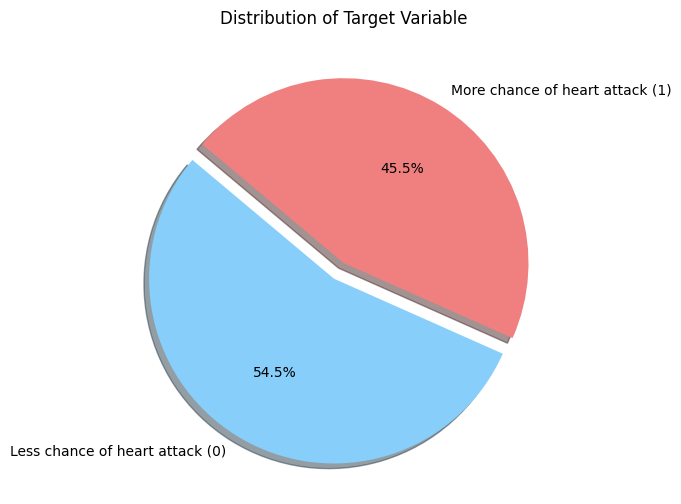

In [ ]:
# Plotting the distribution of the target variable
import matplotlib.pyplot as plt

# Count the number of instances for each target class
target_counts = df['output'].value_counts()

# Create a pie chart
labels = ['Less chance of heart attack (0)', 'More chance of heart attack (1)']
sizes = target_counts.values
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode the first slice (Less chance of heart attack)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Target Variable')
plt.show()


we found that data set is balanced

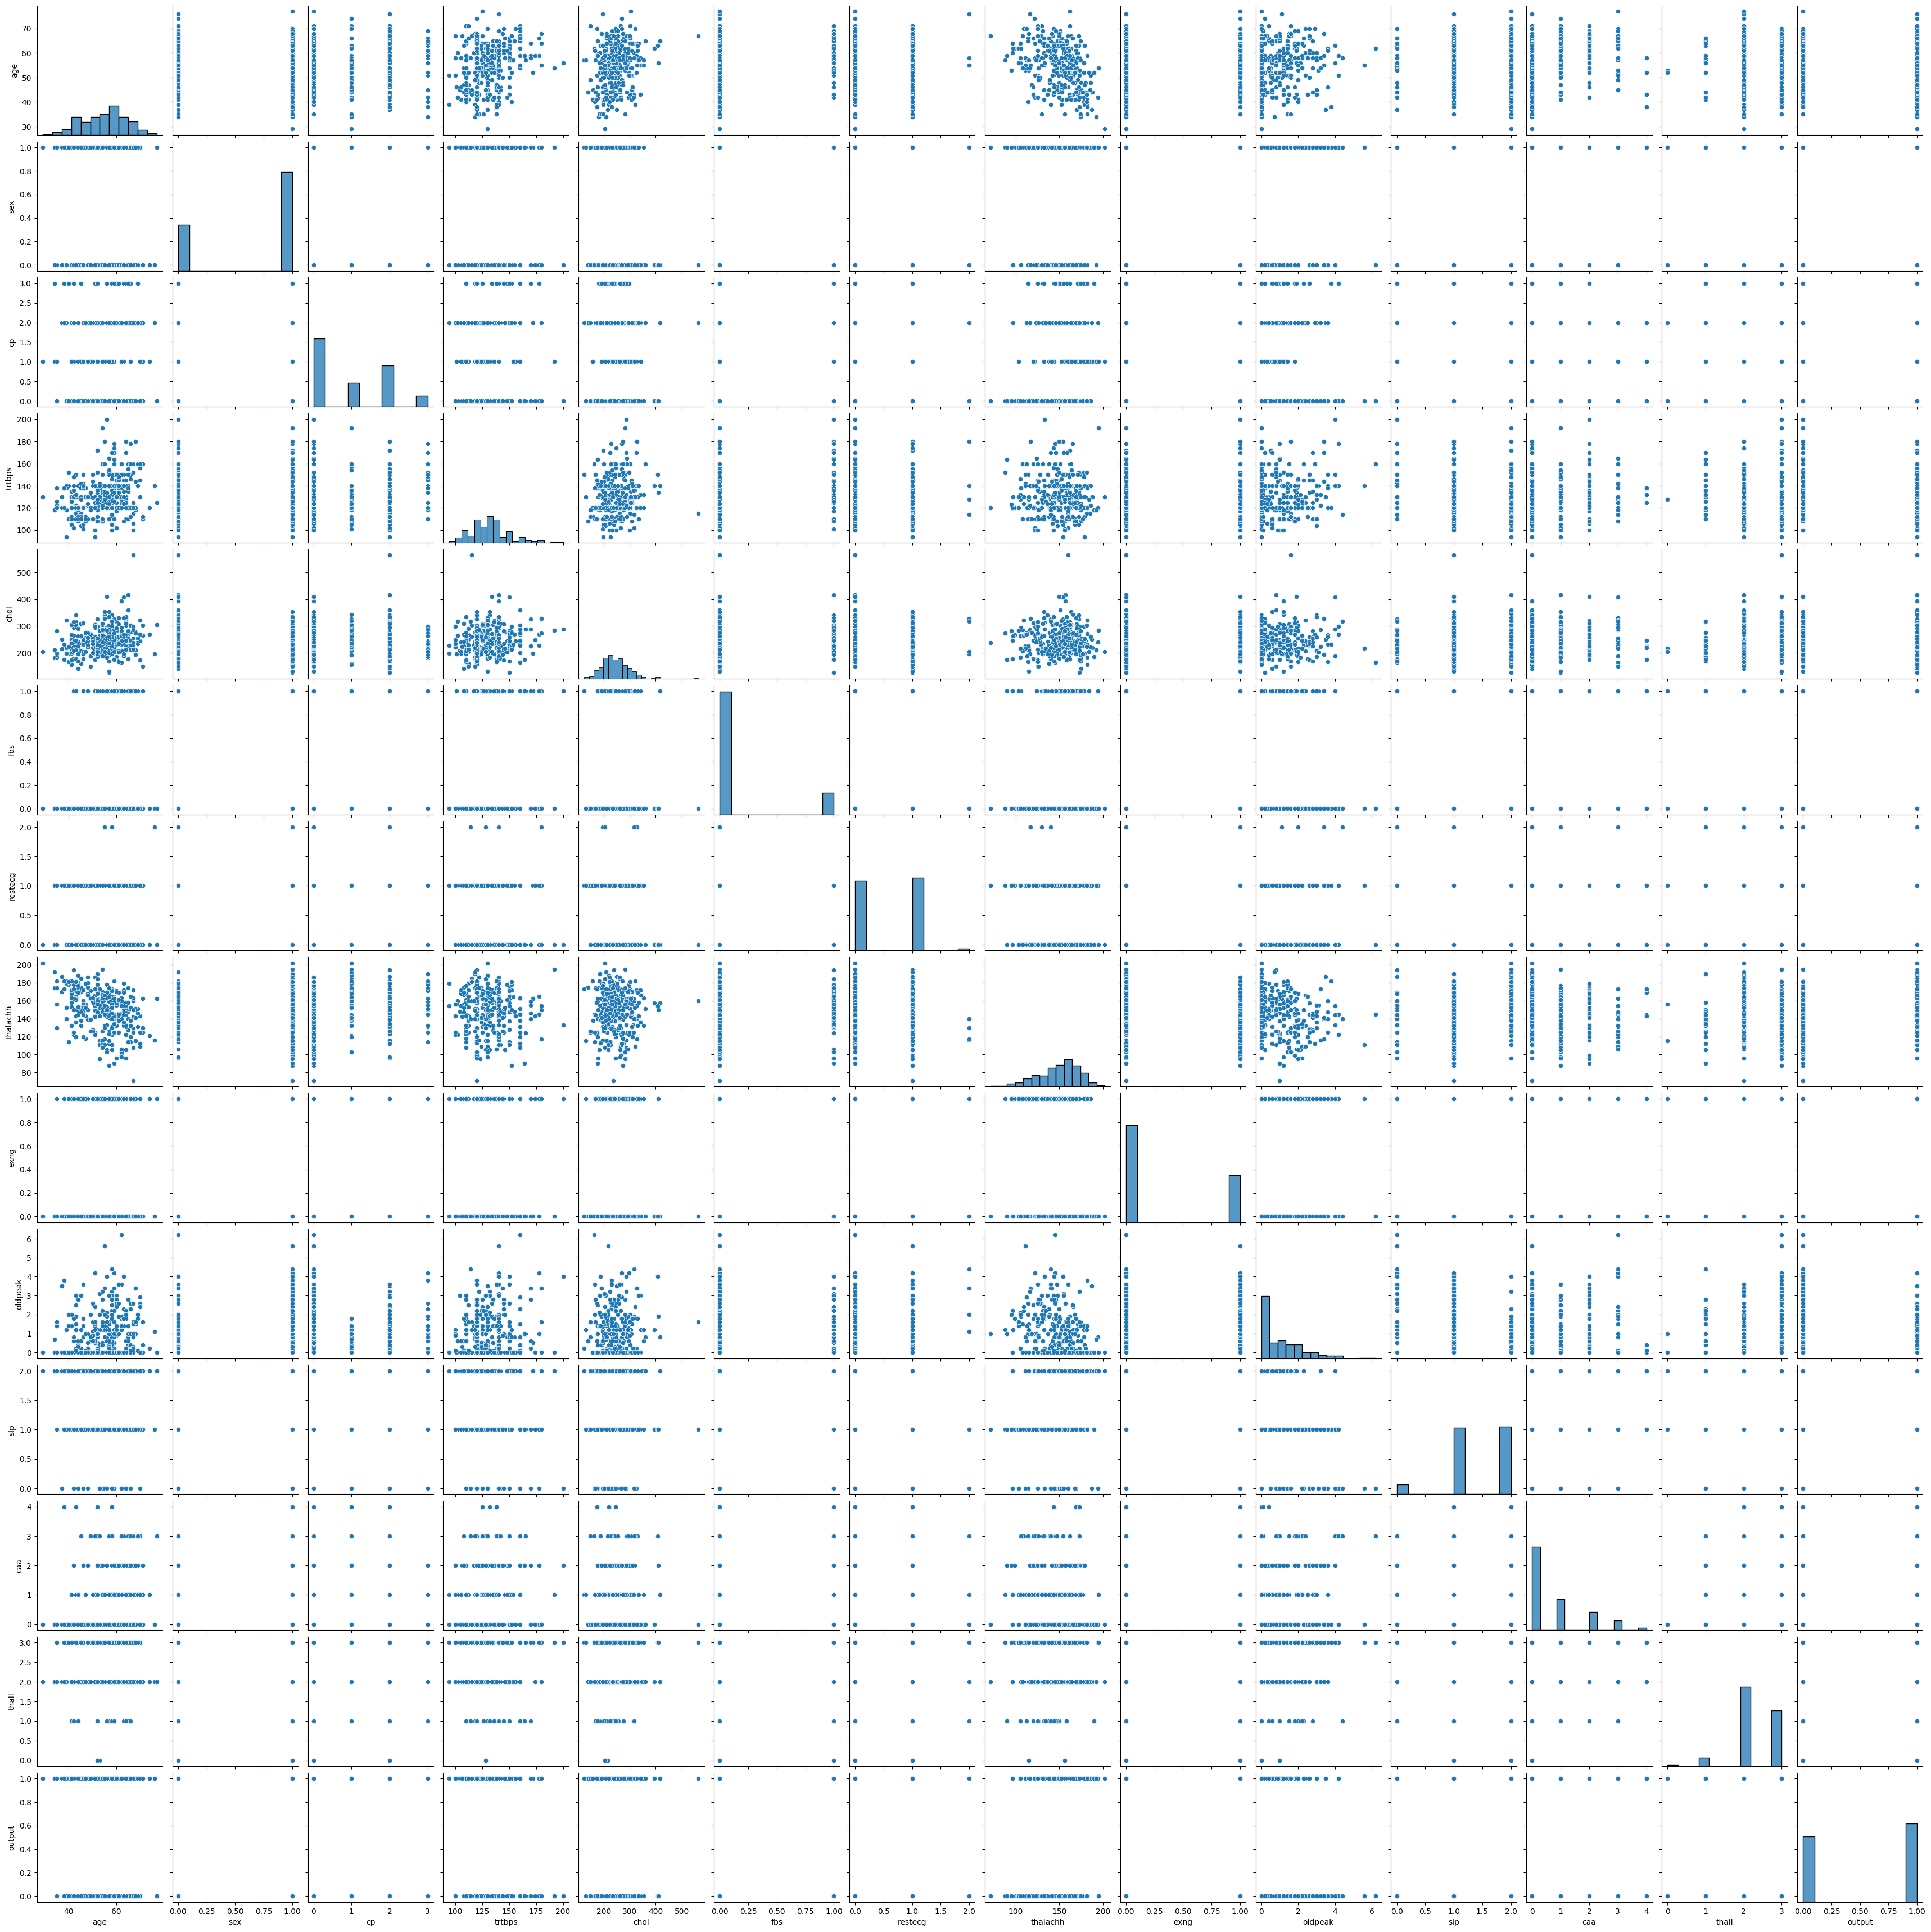

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
output   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg  thalachh      exng   oldpeak       slp       caa  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trtbps   -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalachh  0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exng     -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slp       0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
caa      -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thall    -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
output    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

             thall    output  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trtbps    0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalachh -0.096439  0.421741  
exng      0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slp      -0.104764  0.345877  
caa       0.151832 -0.391724  
thall     1.000000 -0.344029  
output   -0.344029  1.000000

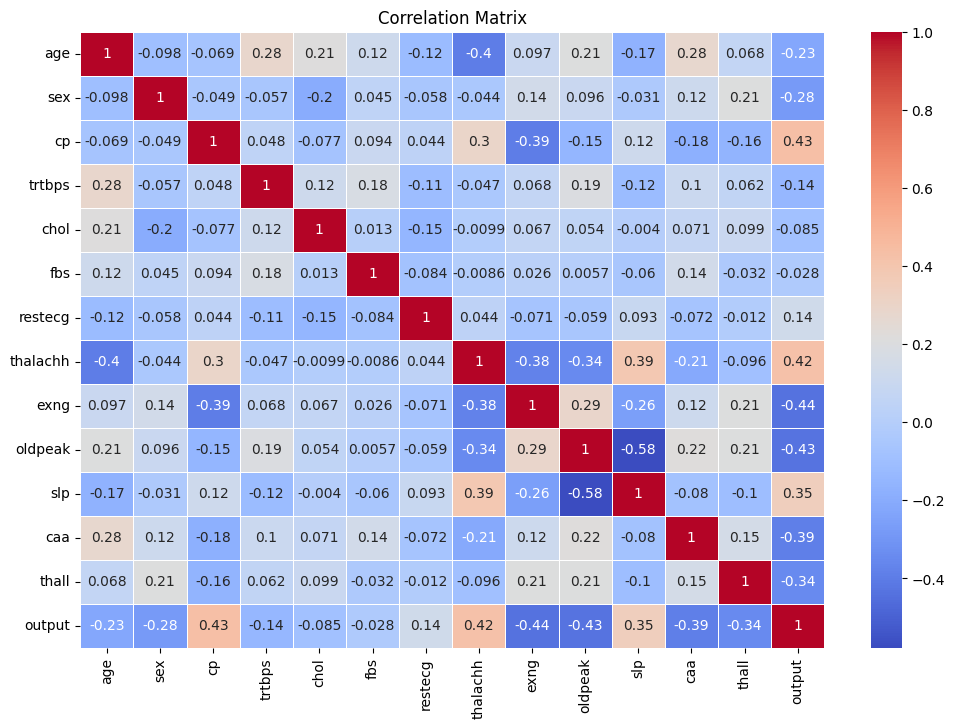

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


here found that there is no coreleted variables in our data

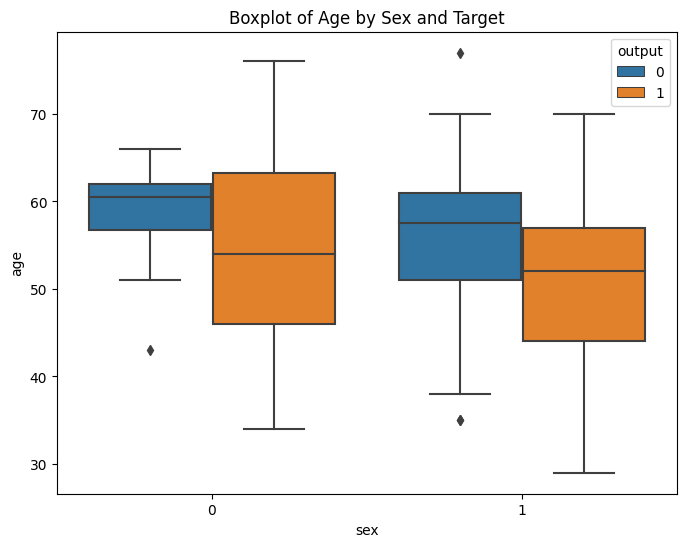

In [ ]:
# Boxplot for 'sex' vs. 'target'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='age', hue='output')
plt.title('Boxplot of Age by Sex and Target')
plt.show()

In [ ]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [ ]:
# applying pandas profiling
profile = ProfileReport(df, title="Profiling Report")


/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:522: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_widgets()
profile.to_notebook_iframe()

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:522: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


In [ ]:
profile.to_file("your_report.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# model building


In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Separate features (X) and target (y)
X = df.drop('output', axis=1)
y = df['output']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


logistic regression

In [ ]:
# Define the pipeline steps
steps = [
    ('scaler', StandardScaler()),  # Step 1: Feature scaling
    ('classifier', LogisticRegression(random_state=42))  # Step 2: Logistic Regression
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predictions on test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7704918032786885

Confusion Matrix:
 [[19 11]
 [ 3 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.63      0.73        30
           1       0.72      0.90      0.80        31

    accuracy                           0.77        61
   macro avg       0.79      0.77      0.77        61
weighted avg       0.79      0.77      0.77        61



In [ ]:
# Hyperparameter Tuning
# Define a new parameter grid with compatible solver and penalty combinations
param_grid = {
    'classifier__penalty': ['l2', 'none'],  # Only 'l2' and 'none' are compatible with most solvers
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'],
    'classifier__max_iter': [50, 100, 200, 500]
}

# Initialize GridSearchCV with the pipeline and revised parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Display best parameters and results
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Predictions using the best estimator
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

# Evaluate the tuned model
print("\nAccuracy after Hyperparameter Tuning:", accuracy_score(y_test, y_pred_tuned))
print("\nConfusion Matrix after Hyperparameter Tuning:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report after Hyperparameter Tuning:\n", classification_report(y_test, y_pred_tuned))


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'classifier__C': 0.01, 'classifier__max_iter': 50, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best CV Score: 0.8637755102040817

Accuracy after Hyperparameter Tuning: 0.7377049180327869

Confusion Matrix after Hyperparameter Tuning:
 [[18 12]
 [ 4 27]]

Classification Report after Hyperparameter Tuning:
               precision    recall  f1-score   support

           0       0.82      0.60      0.69        30
           1       0.69      0.87      0.77        31

    accuracy                           0.74        61
   macro avg       0.76      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dua

In [ ]:
# defining function for evauation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model_performance(y_true, y_pred):
    """
    Evaluate the performance of a classification model using common metrics.

    Parameters:
    - y_true: Actual labels.
    - y_pred: Predicted labels.

    Returns:
    - Accuracy, Confusion Matrix, and Classification Report.
    """
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)

    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{class_report}')

    # return accuracy, conf_matrix, class_report



In [ ]:
# Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
# Initialize Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)


In [ ]:
# Evaluate model performance using the common function
print(evaluate_model_performance(y_test, y_pred))

Accuracy: 78.69%
Confusion Matrix:
[[22  8]
 [ 5 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.76      0.84      0.80        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

None


In [ ]:
# Hyperparameter tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate model performance using the common function
evaluate_model_performance(y_test, y_pred)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Accuracy: 73.77%
Confusion Matrix:
[[18 12]
 [ 4 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        30
           1       0.69      0.87      0.77        31

    accuracy                           0.74        61
   macro avg       0.76      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dua

In [ ]:
#  Support Vector Machine
from sklearn.svm import SVC

In [ ]:
# Standardize features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize vanilla SVM
svc = SVC()

# Train the model
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc.predict(X_test)


In [ ]:
# Evaluate model performance using the common function
evaluate_model_performance(y_test, y_pred)

Accuracy: 73.77%
Confusion Matrix:
[[19 11]
 [ 5 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70        30
           1       0.70      0.84      0.76        31

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



In [ ]:
# tuning
param_grid = {
    'C': [0.1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.1, 10]  # Kernel specific parameter for RBF
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 10], 'gamma': [0.1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [ ]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate model performance using the common function
evaluate_model_performance(y_test, y_pred)


Accuracy: 75.41%
Confusion Matrix:
[[18 12]
 [ 3 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



In [ ]:
#  Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initialize vanilla Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)


In [ ]:
# Evaluate model performance using the common function
evaluate_model_performance(y_test, y_pred)

Accuracy: 72.13%
Confusion Matrix:
[[17 13]
 [ 4 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.57      0.67        30
           1       0.68      0.87      0.76        31

    accuracy                           0.72        61
   macro avg       0.74      0.72      0.71        61
weighted avg       0.74      0.72      0.71        61



In [ ]:
# tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Use the best estimator from GridSearchCV to make predictions
best_dt_classifier = grid_search.best_estimator_
y_pred = best_dt_classifier.predict(X_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
# Evaluate model performance using the common function
evaluate_model_performance(y_test, y_pred)

Accuracy: 72.13%
Confusion Matrix:
[[18 12]
 [ 5 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.60      0.68        30
           1       0.68      0.84      0.75        31

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize the Random Forest Classifier with default settings
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate model performance using the common function
evaluate_model_performance(y_test, y_pred)

Accuracy: 73.77%
Confusion Matrix:
[[19 11]
 [ 5 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70        30
           1       0.70      0.84      0.76        31

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Use the best estimator from GridSearchCV to make predictions
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)
# Evaluate model performance using the common function
evaluate_model_performance(y_test, y_pred)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 73.77%
Confusion Matrix:
[[19 11]
 [ 5 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70        30
           1       0.70      0.84      0.76        31

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



In [ ]:
# XGBOOST
import xgboost as xgb
# Initialize the XGBoost Classifier with default settings
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate model performance using the common function
evaluate_model_performance(y_test, y_pred)

Accuracy: 73.77%
Confusion Matrix:
[[18 12]
 [ 4 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        30
           1       0.69      0.87      0.77        31

    accuracy                           0.74        61
   macro avg       0.76      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



In [ ]:
# tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Initialize XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Use the best estimator from GridSearchCV to make predictions
best_xgb_classifier = grid_search.best_estimator_
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate model performance using the common function
evaluate_model_performance(y_test, y_pred)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}


In [ ]:
# Evaluate model performance using the common function
evaluate_model_performance(y_test, y_pred)

Accuracy: 70.49%
Confusion Matrix:
[[17 13]
 [ 5 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.57      0.65        30
           1       0.67      0.84      0.74        31

    accuracy                           0.70        61
   macro avg       0.72      0.70      0.70        61
weighted avg       0.72      0.70      0.70        61



Neural Network for Classification using TensorFlow and Keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build and Train the Neural Network

model = Sequential()

# Add the input layer
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))

# Add a hidden layer
model.add(Dense(16, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_split=0.2)


Epoch 1/2000
7/7 [==============================] - 1s 48ms/step - loss: 0.7015 - accuracy: 0.5337 - val_loss: 0.6729 - val_accuracy: 0.5918
Epoch 2/2000
7/7 [==============================] - 0s 14ms/step - loss: 0.6691 - accuracy: 0.6062 - val_loss: 0.6527 - val_accuracy: 0.6122
Epoch 3/2000
7/7 [==============================] - 0s 12ms/step - loss: 0.6466 - accuracy: 0.6528 - val_loss: 0.6334 - val_accuracy: 0.6122
Epoch 4/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.6227 - accuracy: 0.7150 - val_loss: 0.6146 - val_accuracy: 0.6939
Epoch 5/2000
7/7 [==============================] - 0s 17ms/step - loss: 0.6009 - accuracy: 0.7668 - val_loss: 0.5985 - val_accuracy: 0.7143
Epoch 6/2000
7/7 [==============================] - 0s 14ms/step - loss: 0.5818 - accuracy: 0.7824 - val_loss: 0.5822 - val_accuracy: 0.7959
Epoch 7/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.5613 - accuracy: 0.7876 - val_loss: 0.5654 - val_accuracy: 0.7959
Epoch 8/2000


In [ ]:
# Predict on test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

2/2 [==============================] - 0s 5ms/step


In [ ]:
# Evaluate model performance using the common function
evaluate_model_performance(y_test, y_pred)

Accuracy: 68.85%
Confusion Matrix:
[[17 13]
 [ 6 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.57      0.64        30
           1       0.66      0.81      0.72        31

    accuracy                           0.69        61
   macro avg       0.70      0.69      0.68        61
weighted avg       0.70      0.69      0.68        61



seelction best one



In [ ]:
df1 = df
X = df1.drop('output', axis=1)
y = df1['output']

In [ ]:
X

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2  
2      0      2  
3      0      2  
4      0      2  
..   ...    ...  
298    0      3  
299    0      3  
300    2      3  
301    1      3  
302    1      2  

[303 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Display descriptive statistics
X_resampled.describe().T.style.background_gradient(axis=0, cmap='Set3')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[25  7]
 [ 4 30]]


Accuracy of Random Forest: 83.33333333333334 

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.81      0.88      0.85        34

    accuracy                           0.83        66
   macro avg       0.84      0.83      0.83        66
weighted avg       0.84      0.83      0.83        66



In [ ]:


rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)


rf_best = grid_search.best_estimator_
print(rf_best)
y_pred = rf_best.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=50, random_state=42)
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.84      0.91      0.87        34

    accuracy                           0.86        66
   macro avg       0.87      0.86      0.86        66
weighted avg       0.87      0.86      0.86        66



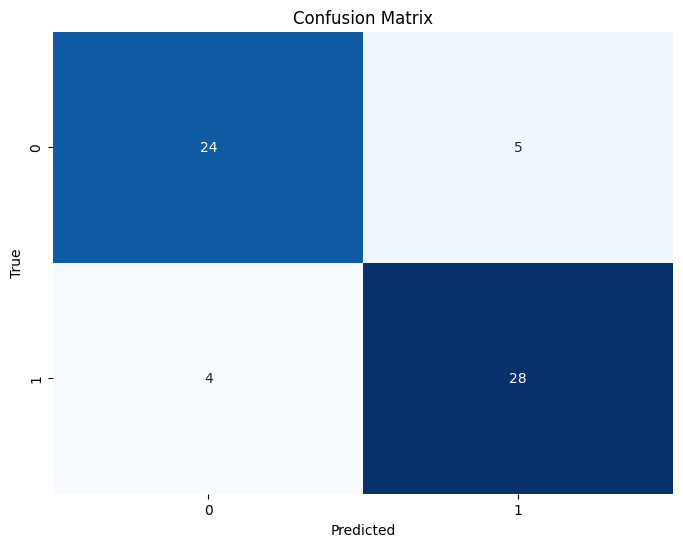

In [ ]:
y_pred = rf_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

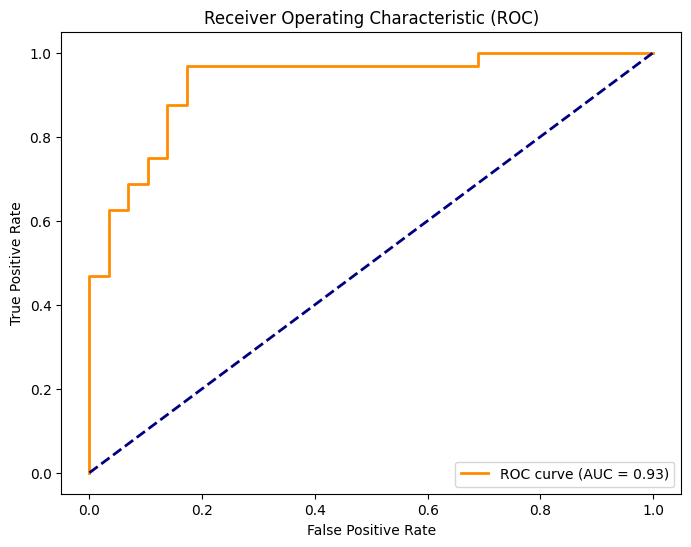

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


y_pred_proba = rf_best.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Evaluate model performance using the common function
evaluate_model_performance(y_test, y_pred)

Accuracy: 86.36%
Confusion Matrix:
[[26  6]
 [ 3 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.84      0.91      0.87        34

    accuracy                           0.86        66
   macro avg       0.87      0.86      0.86        66
weighted avg       0.87      0.86      0.86        66



In [ ]:
df1 = df
X = df1.drop('output', axis=1)
y = df1['output']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# making it in pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Step 1: Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))

# Step 3: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=150,
                            min_samples_split=10,
                            min_samples_leaf=4,
                            random_state=7)

# Create the pipeline
pipeline = Pipeline([
    ('scaler', scaler),       # Step 1
    ('rf', rf)                # Step 3
])


In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rf',
                 RandomForestClassifier(min_samples_leaf=4,
                                        min_samples_split=10, n_estimators=150,
                                        random_state=7))])

In [ ]:
y_pred = pipeline.predict(X_test)


In [ ]:
!pip install pickle5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255317 sha256=aeb02cdafce6d89303a754e59815a68c96deef4e2b32dcef9c8fafb6e4d89070
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [ ]:
import pickle5 as pickle

In [ ]:
# Save the pipeline model to a file using pickle
with open('random_forest_pipeline_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)


In [ ]:
# Evaluate model performance using the common function
evaluate_model_performance(y_test, y_pred)

Accuracy: 86.36%
Confusion Matrix:
[[26  6]
 [ 3 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.84      0.91      0.87        34

    accuracy                           0.86        66
   macro avg       0.87      0.86      0.86        66
weighted avg       0.87      0.86      0.86        66



In [ ]:

# Load the saved pipeline model from pickle
with open('random_forest_pipeline_model.pkl', 'rb') as file:
    pipeline = pickle.load(file)

In [ ]:
# Prepare a single record for prediction
single_record =  [ 63,1,3, 145, 233, 1, 0,150, 0,2.3,0,0,1]

# Convert the single record into a DataFrame
single_df = pd.DataFrame([single_record])

# Make prediction using the loaded pipeline
prediction = pipeline.predict(single_df)

# Print the prediction result
if prediction[0] == 1:
    print("The patient is predicted to have heart disease.")
else:
    print("The patient is predicted not to have heart disease.")

The patient is predicted not to have heart disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
 [ 63,1,3, 145, 233, 1, 0,150, 0,2.3,0,0,1]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [ ]:
df = preprocess_data_single(data)
predictions = pipeline.predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
data = [0.592593	,1	,3	,0.75	,-0.110236	,1	,0	,-0.092308	,0	,0.9375	,0	,0,	1]